# •	Introduction:
This code aims to build a spam classification model using the Naive Bayes algorithm. The purpose is to create a model that can effectively distinguish between spam and ham (non-spam) text messages.


# •	Dataset Loading:

In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("spam.csv", encoding='latin1')

In [3]:
df.shape

(5572, 5)

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4409,ham,You also didnt get na hi hi hi hi hi,NaN,NaN,NaN
2090,ham,S:-)kallis wont play in first two odi:-),NaN,NaN,NaN
3303,ham,IM GONNAMISSU SO MUCH!!I WOULD SAY IL SEND U A...,NaN,NaN,NaN
3844,ham,Mmmm.... I cant wait to lick it!,NaN,NaN,NaN
5344,ham,When you guys planning on coming over?,NaN,NaN,NaN


# Data Cleaning

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns={'v1':'target','v2':'Text'},inplace=True)

In [9]:
df.head()

,target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
#ham=0 spam=1
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#checking missing Values
df.isnull().sum()

target    0
Text      0
dtype: int64

In [14]:
#Checking duplication in data
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

# 2.EDA(Explotary Data Analysis)

In [17]:
df.head()

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

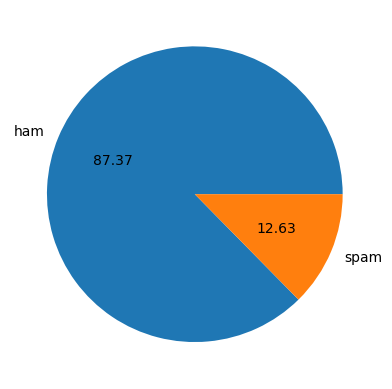

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
#Data is unbalance so we have to balance data 

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['number_of_Charactor'] = df['Text'].apply(len)

In [24]:
df.head()

,target,Text,number_of_Charactor
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df['number_of_Words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [26]:
df.head()

,target,Text,number_of_Charactor,number_of_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['number_of_Sentence'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,Text,number_of_Charactor,number_of_Words,number_of_Sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['number_of_Charactor','number_of_Words','number_of_Sentence']].describe()

,number_of_Charactor,number_of_Words,number_of_Sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#ham messages or email
df[df['target']==0][['number_of_Charactor','number_of_Words','number_of_Sentence']].describe()

,number_of_Charactor,number_of_Words,number_of_Sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#spam messages or email
df[df['target']==1][['number_of_Charactor','number_of_Words','number_of_Sentence']].describe()

,number_of_Charactor,number_of_Words,number_of_Sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns

<Axes: xlabel='number_of_Charactor', ylabel='Count'>

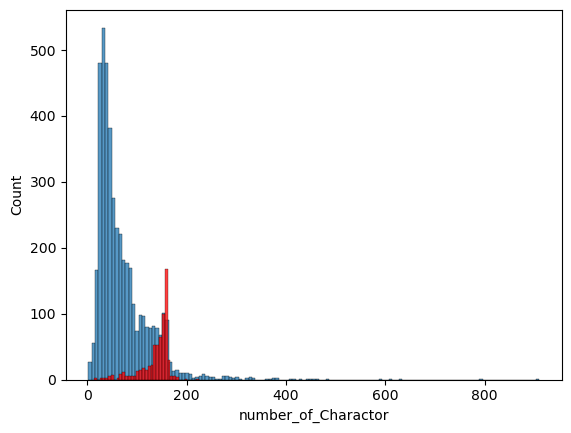

In [33]:
sns.histplot(df[df['target']==0]['number_of_Charactor'])
sns.histplot(df[df['target']==1]['number_of_Charactor'],color='red')

<Axes: xlabel='number_of_Words', ylabel='Count'>

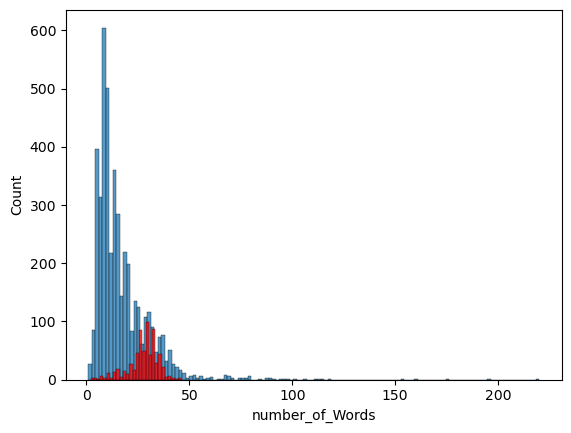

In [34]:
sns.histplot(df[df['target']==0]['number_of_Words'])
sns.histplot(df[df['target']==1]['number_of_Words'],color='red')

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


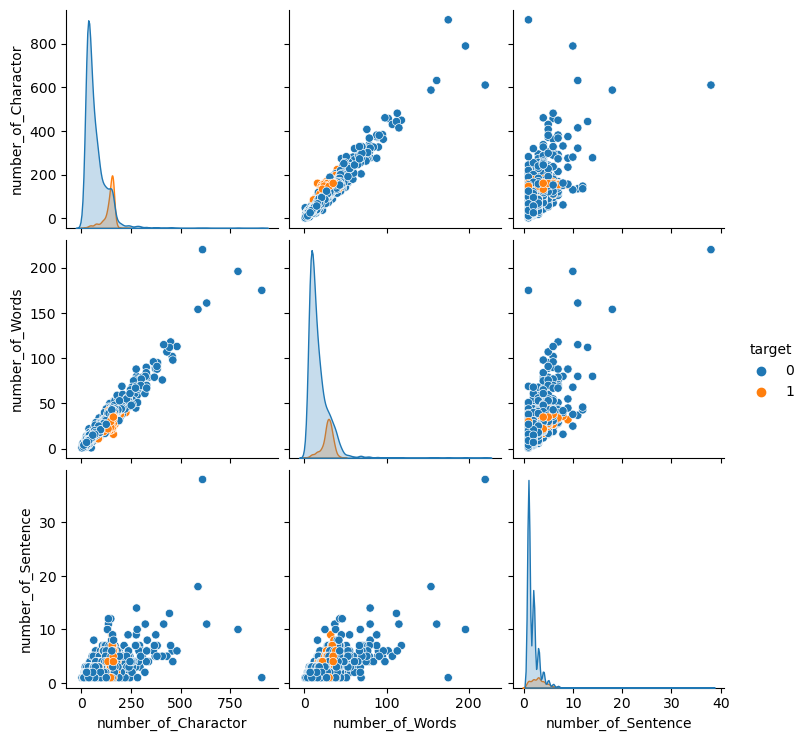

In [35]:
sns.pairplot(df,hue='target')

# Data Preprosessing
 #lower case
 #Tokenize
 #Removing special Character
 #Removing stopwords and punctution
 #Stemming
 

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []

    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]

    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]

    y.clear()
    
    ps = PorterStemmer()
    
    for i in text: 
        y.append(ps.stem(i))

    return " ".join(y)


In [38]:
df['Transform_Text']=df['Text'].apply(transform_text)

In [39]:
df.head()

,target,Text,number_of_Charactor,number_of_Words,number_of_Sentence,Transform_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
spam_corpus = []

for msg in df[df['target'] == 1]['Transform_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [41]:
len(spam_corpus)

9939

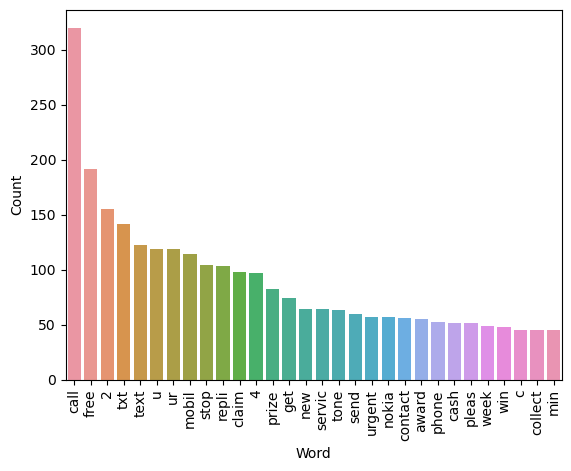

In [42]:
from collections import Counter
word_counts = Counter(spam_corpus)

# Convert Counter to a DataFrame and select the top 30 words
top_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create a barplot using seaborn
sns.barplot(x='Word', y='Count', data=top_words_df)
plt.xticks(rotation='vertical')
plt.show()

# •	Model Building:

In [43]:
ham_corpus = []

for msg in df[df['target'] == 0]['Transform_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

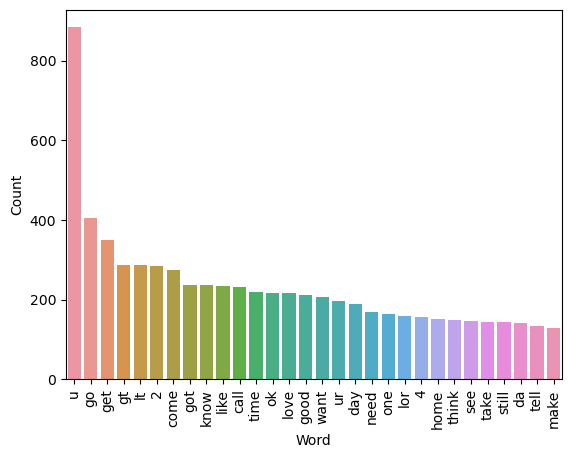

In [44]:
import pandas as pd
import seaborn as sns
from collections import Counter

# Count the occurrences of each word
word_counts = Counter(ham_corpus)

# Convert Counter to a DataFrame and select the top 30 words
top_words = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Drop rows with NaN values (if any)
top_words = top_words.dropna()

# Create a barplot using seaborn
sns.barplot(x='Word', y='Count', data=top_words)
plt.xticks(rotation='vertical')
plt.show()


In [45]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
Tfid = TfidfVectorizer()

In [46]:
X = Tfid.fit_transform(df['Transform_Text']).toarray()

In [47]:
#5159 message and 6708 Words
X.shape

(5169, 6708)

In [48]:
y=df['target'].values

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size=0.2,random_state=2)



In [51]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [52]:
gnb=GaussianNB()

mnb=MultinomialNB()

bnb=BernoulliNB()


# •	Training And Result

In [53]:
gnb.fit(X_train,y_train)

y_predi=gnb.predict(X_test)

In [54]:
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [55]:
gnb.fit(X_train,y_train)
y_pred2=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [56]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [57]:
mnb.fit(X_test,y_test)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [58]:
def is_spam(message, model):
    processed_message = transform_text(message)
    vectorized_message = Tfid.transform([processed_message]).toarray()
    prediction = mnb.predict(vectorized_message)
    return prediction[0]

# Example usage
test_message = "Enter Message to check Model"
result = is_spam(test_message, gnb)

if result == 1:
    print("The message is spam.")
else:
    print("The message is not spam.")


The message is not spam.


In [60]:
import pickle
pickle.dump(Tfid,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))